In [150]:
import pandas as pd
import numpy as np
import os,sys

from scipy.stats import pearsonr
from scipy.stats import spearmanr
import scipy.stats as stats

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

from importlib import reload
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import seaborn as sns

from scipy.stats import mannwhitneyu

%matplotlib inline

sns.set(style="white")
pd.set_option('display.max_columns', None)

In [151]:
perid = pd.read_csv('../../output/perid_plot.csv')


perid.rename(columns = {'min_miDockQ':'min $DockQ_{i}$', 'max_miDockQ':'max $DockQ_{i}$','avg_miDockQ':'avg $DockQ_{i}$', 
                        'min_pwDockQ':'min $DockQ_{ij}$', 'max_pwDockQ':'max $DockQ_{ij}$','avg_pwDockQ':'avg $DockQ_{ij}$',
                        'min_pDockQ':'min pDockQ','min_pmiDockQ':'min pDockQ2', 'MMscore':'MM-score'}, inplace = True)

perid.head(5)

pdbid  num_chains    class  MM-score  RMSD    pTM   ipTM Symmetry  \
0  5mlq           2  homomer   0.97785  1.20  0.866  0.851       C2   
1  5nl6           2  homomer   0.95927  1.62  0.834  0.818       C2   
2  5od9           2  homomer   0.58725  3.72  0.445  0.223       C2   
3  5ow2           2  homomer   0.85494  2.28  0.671  0.662       C2   
4  5w4a           2  homomer   0.93889  1.99  0.870  0.796       C2   

   min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
0             0.913             0.913             0.913            0.913   
1             0.660             0.660             0.660            0.660   
2             0.059             0.059             0.059            0.059   
3             0.617             0.617             0.617            0.617   
4             0.661             0.661             0.661            0.661   

   avg $DockQ_{i}$  max $DockQ_{i}$  min_interPAE  min pDockQ  min pDockQ2  
0            0.913            0.913      8.894755    0.459902     0.900757  
1            0.660            0.660      6.939106    0.452864     0.641370  
2            0.059            0.059     18.369370    0.076469     0.022005  
3            0.617            0.617     14.842103    0.517812     0.434434  
4            0.661            0.661      7.369001    0.402802     0.621381

In [152]:
perchain = pd.read_csv('../../output/perchain_plot.csv')

perchain.rename(columns = {'miDockQ':'$DockQ_{i}$', 'pwDockQ':'$DockQ_{ij}$', 'pmiDockQ':'pDockQ2' }, inplace = True)

perchain.head(5)

pdbid  num_chains    class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0  5mlq           2  homomer      A        0.913         0.913   
1  5mlq           2  homomer      B        0.913         0.913   
2  5nl6           2  homomer      A        0.660         0.660   
3  5nl6           2  homomer      B        0.660         0.660   
4  5od9           2  homomer      A        0.059         0.059   

   Fnat_native_contacts   IF_plDDT   interPAE    pDockQ   pDockQ2  
0                    42  97.274412   8.898357  0.459902  0.900757  
1                    42  97.274412   8.894755  0.459902  0.900757  
2                    95  90.246667   6.939106  0.452864  0.641370  
3                    95  90.246667   6.949329  0.452864  0.641370  
4                    44  63.968125  18.409119  0.076469  0.022005

In [153]:
perid_above2 = perid[perid['num_chains']>2]
perchain_above2 = perchain[perchain['num_chains']>2]

## Figure 1

<ipython-input-161-49a494c511fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perid_above2['Venn_MM'] = np.select(conditions1, values)
<ipython-input-161-49a494c511fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perid_above2['Venn_miDockQ'] = np.select(conditions2, values)
<ipython-input-161-49a494c511fc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

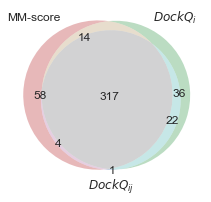

In [161]:
conditions1 = [
    (perid_above2['MM-score'] < 0.75),
    (perid_above2['MM-score'] >= 0.75)
]

conditions2 = [
    (perid_above2['min $DockQ_{i}$'] < 0.23),
    (perid_above2['min $DockQ_{i}$'] >= 0.23)
]

conditions3 = [
    (perid_above2['min $DockQ_{ij}$'] < 0.23),
    (perid_above2['min $DockQ_{ij}$'] >= 0.23)
]

values = [0,1]

perid_above2['Venn_MM'] = np.select(conditions1, values)
perid_above2['Venn_miDockQ'] = np.select(conditions2, values)
perid_above2['Venn_pwDockQ'] = np.select(conditions3, values)

v1 = len(perid_above2[(perid_above2['Venn_MM']==1) & (perid_above2['Venn_miDockQ']==0) & (perid_above2['Venn_pwDockQ']==0)])
v2 = len(perid_above2[(perid_above2['Venn_MM']==0) & (perid_above2['Venn_miDockQ']==1) & (perid_above2['Venn_pwDockQ']==0)])
v3 = len(perid_above2[(perid_above2['Venn_MM']==1) & (perid_above2['Venn_miDockQ']==1) & (perid_above2['Venn_pwDockQ']==0)])
v4 = len(perid_above2[(perid_above2['Venn_MM']==0) & (perid_above2['Venn_miDockQ']==0) & (perid_above2['Venn_pwDockQ']==1)])
v5 = len(perid_above2[(perid_above2['Venn_MM']==1) & (perid_above2['Venn_miDockQ']==0) & (perid_above2['Venn_pwDockQ']==1)])
v6 = len(perid_above2[(perid_above2['Venn_MM']==0) & (perid_above2['Venn_miDockQ']==1) & (perid_above2['Venn_pwDockQ']==1)])
v7 = len(perid_above2[(perid_above2['Venn_MM']==1) & (perid_above2['Venn_miDockQ']==1) & (perid_above2['Venn_pwDockQ']==1)])

set1 = (perid_above2['Venn_MM'])
set2 = (perid_above2['Venn_miDockQ'])
set3 = (perid_above2['Venn_pwDockQ'])

axis_font = {'size':'12'}
plt.figure(figsize=(3.5,3.5))

out = venn3(subsets=(v1, v2, v3, v4, v5, v6, v7), 
     set_labels= ('MM-score', '$DockQ_{i}$', '$DockQ_{ij}$'))

for text in out.set_labels:
   text.set_fontsize(12)

for text in out.subset_labels:
   text.set_fontsize(12)

plt.savefig('figures/venn.jpg', dpi=350)
plt.show()

## DockQ i vs DockQ ij

In [51]:
perid_above2['diff $DockQ_{i}$'] = perid_above2['max $DockQ_{i}$'] - perid_above2['min $DockQ_{i}$']
perid_above2['diff $DockQ_{ij}$'] = perid_above2['max $DockQ_{ij}$'] - perid_above2['min $DockQ_{ij}$']

<ipython-input-51-9d330f5040ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perid_above2['diff $DockQ_{i}$'] = perid_above2['max $DockQ_{i}$'] - perid_above2['min $DockQ_{i}$']
<ipython-input-51-9d330f5040ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perid_above2['diff $DockQ_{ij}$'] = perid_above2['max $DockQ_{ij}$'] - perid_above2['min $DockQ_{ij}$']


In [52]:
perid_above2['diff $DockQ_{i}$'].mean()
perid_above2['diff $DockQ_{ij}$'].mean()

0.2956602564102563

In [53]:
len(perid_above2[perid_above2['diff $DockQ_{i}$']>0.3])/len(perid_above2)
len(perid_above2[perid_above2['diff $DockQ_{ij}$']>0.3])/len(perid_above2)

0.4230769230769231

## Figure 2

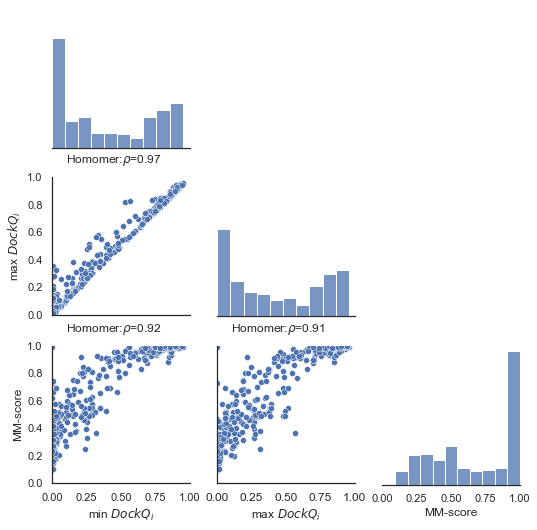

In [18]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y)
    label = r'$\rho$='+ str(round(r, 2))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.1,1.1) #if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("Homomer:{}".format(label), xy = pos, size = 12, xycoords = ax.transAxes)

#dfm_select = perid_above2[['min $DockQ_{i}$', 'max $DockQ_{i}$', 'min $DockQ_{ij}$', 'max $DockQ_{ij}$', 'MMscore','class']]
dfm_select = perid_above2[['min $DockQ_{i}$', 'max $DockQ_{i}$', 'MM-score','class']]
dfm_select1 = dfm_select[dfm_select["class"]=='homomer']

g=sns.pairplot(data=dfm_select1, corner=True)
#g=sns.pairplot(data=dfm_select, hue='class', corner=True)
g.map_lower(corrfunc)

axis_font = {'size':'12'}

plt.subplots_adjust(wspace =0.2,hspace =0.2)
g.set(ylim=(0,1))
g.set(xlim=(0,1))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.85, 0.5))
#g._legend.remove()

plt.savefig('figures/dockqi_homo_pairplot_1-both.jpg',dpi=450)
plt.show()

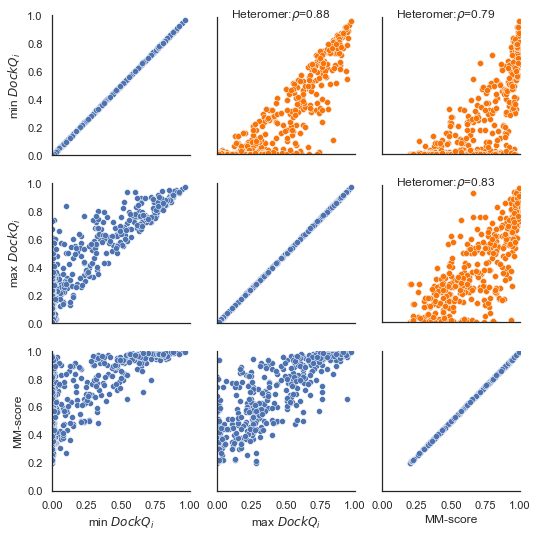

In [19]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y)
    label = r'$\rho$='+ str(round(r, 2))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.1,0.99) #if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("Heteromer:{}".format(label), xy = pos, size = 12, xycoords = ax.transAxes)

#dfm_select = perid_above2[['min $DockQ_{i}$', 'max $DockQ_{i}$', 'min $DockQ_{ij}$', 'max $DockQ_{ij}$', 'MMscore','class']]
dfm_select = perid_above2[['min $DockQ_{i}$', 'max $DockQ_{i}$', 'MM-score','class']]
dfm_select = dfm_select[dfm_select["class"]=='heteromer']

g=sns.pairplot(data=dfm_select, corner=False, diag_kind=None)
g.map_upper(sns.scatterplot,color=sns.xkcd_rgb['orange'])
g.map_upper(corrfunc)

axis_font = {'size':'12'}

plt.subplots_adjust(wspace =0.2,hspace =0.2)
g.set(ylim=(0,1))
g.set(xlim=(0,1))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.85, 0.5))
#g._legend.remove()

plt.savefig('figures/dockqi_hete_pairplot_1.jpg',dpi=450)
plt.show()

# Figure 3

In [54]:
perchain=perchain.drop_duplicates(subset = ['pdbid', '$DockQ_{i}$','chain1'],keep = 'last').reset_index(drop = True)
succdockq_IFcount=perchain.groupby('pdbid').apply(lambda grp: len(grp[grp['$DockQ_{i}$']>=0.23])).reset_index()
succdockq_IFcount.rename(columns={0:'No. of correct interfaces'},inplace=True)
perchain=perchain.merge(succdockq_IFcount,on='pdbid')
perchain.head(4)

pdbid  num_chains    class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0  5mlq           2  homomer      A        0.913         0.913   
1  5mlq           2  homomer      B        0.913         0.913   
2  5nl6           2  homomer      A        0.660         0.660   
3  5nl6           2  homomer      B        0.660         0.660   

   Fnat_native_contacts   IF_plDDT  interPAE    pDockQ   pDockQ2  \
0                    42  97.274412  8.898357  0.459902  0.900757   
1                    42  97.274412  8.894755  0.459902  0.900757   
2                    95  90.246667  6.939106  0.452864  0.641370   
3                    95  90.246667  6.949329  0.452864  0.641370   

   No. of correct interfaces  
0                          2  
1                          2  
2                          2  
3                          2

In [55]:
perchain['%correct_interfaces']=(perchain['No. of correct interfaces']/perchain['num_chains']).round(2)
perchain

pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0     5mlq           2    homomer      A        0.913         0.913   
1     5mlq           2    homomer      B        0.913         0.913   
2     5nl6           2    homomer      A        0.660         0.660   
3     5nl6           2    homomer      B        0.660         0.660   
4     5od9           2    homomer      A        0.059         0.059   
...    ...         ...        ...    ...          ...           ...   
5504  7xq8           6  heteromer      B        0.159         0.009   
5505  7xq8           6  heteromer      C        0.279         0.301   
5506  7xq8           6  heteromer      D        0.271         0.329   
5507  7xq8           6  heteromer      E        0.098         0.555   
5508  7xq8           6  heteromer      F        0.097         0.555   

      Fnat_native_contacts   IF_plDDT   interPAE    pDockQ   pDockQ2  \
0                       42  97.274412   8.898357  0.459902  0.900757   
1                       42  97.274412   8.894755  0.459902  0.900757   
2                       95  90.246667   6.939106  0.452864  0.641370   
3                       95  90.246667   6.949329  0.452864  0.641370   
4                       44  63.968125  18.409119  0.076469  0.022005   
...                    ...        ...        ...       ...       ...   
5504                   269  71.300647   0.046883  0.509228  0.143792   
5505                    38  85.426667   0.054324  0.532051  0.553188   
5506                    42  85.090952   0.048747  0.528933  0.545155   
5507                   167  68.914524  -0.019401  0.230599  0.212338   
5508                   172  68.914524  -0.018349  0.230599  0.212338   

      No. of correct interfaces  %correct_interfaces  
0                             2                 1.00  
1                             2                 1.00  
2                             2                 1.00  
3                             2                 1.00  
4                             0                 0.00  
...                         ...                  ...  
5504                          2                 0.33  
5505                          2                 0.33  
5506                          2                 0.33  
5507                          2                 0.33  
5508                          2                 0.33  

[5509 rows x 13 columns]

In [56]:
def gfunc(row):
    if row['%correct_interfaces']==0:
        val = 'None'
    elif row['%correct_interfaces']==1:
        val = 'All'
    else:
        val = 'Some'
    return val

perchain['Correct Interfaces'] = perchain.apply(gfunc, axis=1)
perchain

pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0     5mlq           2    homomer      A        0.913         0.913   
1     5mlq           2    homomer      B        0.913         0.913   
2     5nl6           2    homomer      A        0.660         0.660   
3     5nl6           2    homomer      B        0.660         0.660   
4     5od9           2    homomer      A        0.059         0.059   
...    ...         ...        ...    ...          ...           ...   
5504  7xq8           6  heteromer      B        0.159         0.009   
5505  7xq8           6  heteromer      C        0.279         0.301   
5506  7xq8           6  heteromer      D        0.271         0.329   
5507  7xq8           6  heteromer      E        0.098         0.555   
5508  7xq8           6  heteromer      F        0.097         0.555   

      Fnat_native_contacts   IF_plDDT   interPAE    pDockQ   pDockQ2  \
0                       42  97.274412   8.898357  0.459902  0.900757   
1                       42  97.274412   8.894755  0.459902  0.900757   
2                       95  90.246667   6.939106  0.452864  0.641370   
3                       95  90.246667   6.949329  0.452864  0.641370   
4                       44  63.968125  18.409119  0.076469  0.022005   
...                    ...        ...        ...       ...       ...   
5504                   269  71.300647   0.046883  0.509228  0.143792   
5505                    38  85.426667   0.054324  0.532051  0.553188   
5506                    42  85.090952   0.048747  0.528933  0.545155   
5507                   167  68.914524  -0.019401  0.230599  0.212338   
5508                   172  68.914524  -0.018349  0.230599  0.212338   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  
0                             2                 1.00                All  
1                             2                 1.00                All  
2                             2                 1.00                All  
3                             2                 1.00                All  
4                             0                 0.00               None  
...                         ...                  ...                ...  
5504                          2                 0.33               Some  
5505                          2                 0.33               Some  
5506                          2                 0.33               Some  
5507                          2                 0.33               Some  
5508                          2                 0.33               Some  

[5509 rows x 14 columns]

In [57]:
perchain_2 = perchain[perchain['num_chains']==2]

perchain_2_homo=perchain_2[perchain_2['class']=='homomer']

a=len(perchain_2_homo.loc[perchain_2_homo['Correct Interfaces']=='All'])
b=len(perchain_2_homo.loc[perchain_2_homo['Correct Interfaces']=='Some'])
c=len(perchain_2_homo.loc[perchain_2_homo['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_2_homo['%correct_interfaces'].unique()
perchain_2_homo['Frac'] = perchain_2_homo.apply(f, axis=1)

perchain_2_hete=perchain_2[perchain_2['class']=='heteromer']

a=len(perchain_2_hete.loc[perchain_2_hete['Correct Interfaces']=='All'])
b=len(perchain_2_hete.loc[perchain_2_hete['Correct Interfaces']=='Some'])
c=len(perchain_2_hete.loc[perchain_2_hete['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_2_hete['%correct_interfaces'].unique()
perchain_2_hete['Frac'] = perchain_2_hete.apply(f, axis=1)

result = [perchain_2_homo,perchain_2_hete]
perchain_2 = pd.concat(result, axis=0)

<ipython-input-57-4eeebc7bff59>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_2_homo['Frac'] = perchain_2_homo.apply(f, axis=1)
<ipython-input-57-4eeebc7bff59>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_2_hete['Frac'] = perchain_2_hete.apply(f, axis=1)


In [58]:
perchain_3 = perchain[perchain['num_chains']==3]

perchain_3_homo=perchain_3[perchain_3['class']=='homomer']

a=len(perchain_3_homo.loc[perchain_3_homo['Correct Interfaces']=='All'])
b=len(perchain_3_homo.loc[perchain_3_homo['Correct Interfaces']=='Some'])
c=len(perchain_3_homo.loc[perchain_3_homo['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_3_homo['%correct_interfaces'].unique()
perchain_3_homo['Frac'] = perchain_3_homo.apply(f, axis=1)

perchain_3_hete=perchain_3[perchain_3['class']=='heteromer']

a=len(perchain_3_hete.loc[perchain_3_hete['Correct Interfaces']=='All'])
b=len(perchain_3_hete.loc[perchain_3_hete['Correct Interfaces']=='Some'])
c=len(perchain_3_hete.loc[perchain_3_hete['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_3_hete['%correct_interfaces'].unique()
perchain_3_hete['Frac'] = perchain_3_hete.apply(f, axis=1)

result = [perchain_3_homo,perchain_3_hete]
perchain_3 = pd.concat(result, axis=0)

perchain_3

<ipython-input-58-246ae2fb7a70>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_3_homo['Frac'] = perchain_3_homo.apply(f, axis=1)
<ipython-input-58-246ae2fb7a70>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_3_hete['Frac'] = perchain_3_hete.apply(f, axis=1)


pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
2296  5w5p           3    homomer      A        0.188         0.193   
2297  5w5p           3    homomer      C        0.182         0.157   
2298  5w5p           3    homomer      B        0.152         0.157   
2299  5w6h           3    homomer      A        0.707         0.706   
2300  5w6h           3    homomer      B        0.719         0.732   
...    ...         ...        ...    ...          ...           ...   
2949  7xw7           3  heteromer      B        0.525         0.760   
2950  7xw7           3  heteromer      C        0.629         0.760   
2951  7y6c           3  heteromer      A        0.942         0.913   
2952  7y6c           3  heteromer      B        0.920         0.884   
2953  7y6c           3  heteromer      C        0.885         0.884   

      Fnat_native_contacts   IF_plDDT  interPAE    pDockQ   pDockQ2  \
2296                   694  75.292476  0.599024  0.652618  0.237800   
2297                   694  72.854529  0.597716  0.645737  0.169589   
2298                   694  74.786461  0.599946  0.649823  0.221882   
2299                   564  83.973423  0.608077  0.678554  0.411309   
2300                   568  84.127215  0.609715  0.679113  0.415437   
...                    ...        ...       ...       ...       ...   
2949                    23  83.429800  0.458074  0.429482  0.379800   
2950                     3  74.484706  0.413337  0.125726  0.120121   
2951                    81  95.620392  0.833515  0.526211  0.874454   
2952                   104  92.723600  0.786839  0.607238  0.760854   
2953                    49  87.682791  0.607545  0.398441  0.528675   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  \
2296                          0                  0.0               None   
2297                          0                  0.0               None   
2298                          0                  0.0               None   
2299                          3                  1.0                All   
2300                          3                  1.0                All   
...                         ...                  ...                ...   
2949                          3                  1.0                All   
2950                          3                  1.0                All   
2951                          3                  1.0                All   
2952                          3                  1.0                All   
2953                          3                  1.0                All   

          Frac  
2296  0.395349  
2297  0.395349  
2298  0.395349  
2299  0.593023  
2300  0.593023  
...        ...  
2949  0.525000  
2950  0.525000  
2951  0.525000  
2952  0.525000  
2953  0.525000  

[658 rows x 15 columns]

In [59]:
perchain_3 = perchain[perchain['num_chains']==3]

perchain_3_homo=perchain_3[perchain_3['class']=='homomer']

a=len(perchain_3_homo.loc[perchain_3_homo['Correct Interfaces']=='All'])
b=len(perchain_3_homo.loc[perchain_3_homo['Correct Interfaces']=='Some'])
c=len(perchain_3_homo.loc[perchain_3_homo['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_3_homo['%correct_interfaces'].unique()
perchain_3_homo['Frac'] = perchain_3_homo.apply(f, axis=1)

perchain_3_hete=perchain_3[perchain_3['class']=='heteromer']

a=len(perchain_3_hete.loc[perchain_3_hete['Correct Interfaces']=='All'])
b=len(perchain_3_hete.loc[perchain_3_hete['Correct Interfaces']=='Some'])
c=len(perchain_3_hete.loc[perchain_3_hete['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_3_hete['%correct_interfaces'].unique()
perchain_3_hete['Frac'] = perchain_3_hete.apply(f, axis=1)

result = [perchain_3_homo,perchain_3_hete]
perchain_3 = pd.concat(result, axis=0)

perchain_3

<ipython-input-59-246ae2fb7a70>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_3_homo['Frac'] = perchain_3_homo.apply(f, axis=1)
<ipython-input-59-246ae2fb7a70>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_3_hete['Frac'] = perchain_3_hete.apply(f, axis=1)


pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
2296  5w5p           3    homomer      A        0.188         0.193   
2297  5w5p           3    homomer      C        0.182         0.157   
2298  5w5p           3    homomer      B        0.152         0.157   
2299  5w6h           3    homomer      A        0.707         0.706   
2300  5w6h           3    homomer      B        0.719         0.732   
...    ...         ...        ...    ...          ...           ...   
2949  7xw7           3  heteromer      B        0.525         0.760   
2950  7xw7           3  heteromer      C        0.629         0.760   
2951  7y6c           3  heteromer      A        0.942         0.913   
2952  7y6c           3  heteromer      B        0.920         0.884   
2953  7y6c           3  heteromer      C        0.885         0.884   

      Fnat_native_contacts   IF_plDDT  interPAE    pDockQ   pDockQ2  \
2296                   694  75.292476  0.599024  0.652618  0.237800   
2297                   694  72.854529  0.597716  0.645737  0.169589   
2298                   694  74.786461  0.599946  0.649823  0.221882   
2299                   564  83.973423  0.608077  0.678554  0.411309   
2300                   568  84.127215  0.609715  0.679113  0.415437   
...                    ...        ...       ...       ...       ...   
2949                    23  83.429800  0.458074  0.429482  0.379800   
2950                     3  74.484706  0.413337  0.125726  0.120121   
2951                    81  95.620392  0.833515  0.526211  0.874454   
2952                   104  92.723600  0.786839  0.607238  0.760854   
2953                    49  87.682791  0.607545  0.398441  0.528675   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  \
2296                          0                  0.0               None   
2297                          0                  0.0               None   
2298                          0                  0.0               None   
2299                          3                  1.0                All   
2300                          3                  1.0                All   
...                         ...                  ...                ...   
2949                          3                  1.0                All   
2950                          3                  1.0                All   
2951                          3                  1.0                All   
2952                          3                  1.0                All   
2953                          3                  1.0                All   

          Frac  
2296  0.395349  
2297  0.395349  
2298  0.395349  
2299  0.593023  
2300  0.593023  
...        ...  
2949  0.525000  
2950  0.525000  
2951  0.525000  
2952  0.525000  
2953  0.525000  

[658 rows x 15 columns]

In [60]:
perchain_4 = perchain[perchain['num_chains']==4]
print (perchain_4['%correct_interfaces'].unique())

perchain_4_homo=perchain_4[perchain_4['class']=='homomer']

a=len(perchain_4_homo.loc[perchain_4_homo['Correct Interfaces']=='All'])
b=len(perchain_4_homo.loc[perchain_4_homo['Correct Interfaces']=='Some'])
c=len(perchain_4_homo.loc[perchain_4_homo['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_4_homo['%correct_interfaces'].unique()
perchain_4_homo['Frac'] = perchain_4_homo.apply(f, axis=1)

perchain_4_hete=perchain_4[perchain_4['class']=='heteromer']

a=len(perchain_4_hete.loc[perchain_4_hete['Correct Interfaces']=='All'])
b=len(perchain_4_hete.loc[perchain_4_hete['Correct Interfaces']=='Some'])
c=len(perchain_4_hete.loc[perchain_4_hete['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_4_hete['%correct_interfaces'].unique()
perchain_4_hete['Frac'] = perchain_4_hete.apply(f, axis=1)

result = [perchain_4_homo,perchain_4_hete]
perchain_4 = pd.concat(result, axis=0)

perchain_4

[1.   0.   0.5  0.75 0.25]


<ipython-input-60-774f8107b092>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_4_homo['Frac'] = perchain_4_homo.apply(f, axis=1)
<ipython-input-60-774f8107b092>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_4_hete['Frac'] = perchain_4_hete.apply(f, axis=1)


pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
2954  5owo           4    homomer      A        0.384         0.840   
2955  5owo           4    homomer      B        0.286         0.023   
2956  5owo           4    homomer      C        0.288         0.824   
2957  5owo           4    homomer      D        0.389         0.824   
2958  5wch           4    homomer      D        0.015         0.004   
...    ...         ...        ...    ...          ...           ...   
4409  7zwf           4  heteromer      D        0.024         0.023   
4410  7zwf           4  heteromer      B        0.046         0.078   
4411  7zwf           4  heteromer      C        0.020         0.023   
4412  7zwh           4  heteromer      A        0.002         0.002   
4413  7zwh           4  heteromer      C        0.001         0.002   

      Fnat_native_contacts   IF_plDDT  interPAE    pDockQ   pDockQ2  \
2954                   151  88.571735  0.364735  0.611483  0.555439   
2955                   188  82.386541  0.377745  0.612210  0.176532   
2956                   187  81.854179  0.376809  0.608685  0.165826   
2957                   150  88.295612  0.361577  0.609788  0.519838   
2958                    58  32.662121 -0.031788  0.036827  0.008329   
...                    ...        ...       ...       ...       ...   
4409                    88  68.164545 -0.024767  0.537394  0.010162   
4410                   111  59.683404 -0.017716  0.581104  0.009503   
4411                   111  58.370297 -0.025054  0.535525  0.009340   
4412                    24   0.000000 -0.047731  0.012720  0.007325   
4413                    25   0.000000 -0.040429  0.012720  0.007325   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  \
2954                          4                  1.0                All   
2955                          4                  1.0                All   
2956                          4                  1.0                All   
2957                          4                  1.0                All   
2958                          0                  0.0               None   
...                         ...                  ...                ...   
4409                          0                  0.0               None   
4410                          0                  0.0               None   
4411                          0                  0.0               None   
4412                          0                  0.0               None   
4413                          0                  0.0               None   

          Frac  
2954  0.560440  
2955  0.560440  
2956  0.560440  
2957  0.560440  
2958  0.362637  
...        ...  
4409  0.254098  
4410  0.254098  
4411  0.254098  
4412  0.254098  
4413  0.254098  

[1460 rows x 15 columns]

In [61]:
perchain_5 = perchain[perchain['num_chains']==5]
print (perchain_5['%correct_interfaces'].unique())

perchain_5_homo=perchain_5[perchain_5['class']=='homomer']


a=len(perchain_5_homo.loc[perchain_5_homo['Correct Interfaces']=='All'])
b=len(perchain_5_homo.loc[perchain_5_homo['Correct Interfaces']=='Some'])
c=len(perchain_5_homo.loc[perchain_5_homo['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val


perchain_5_homo['%correct_interfaces'].unique()
perchain_5_homo['Frac'] = perchain_5_homo.apply(f, axis=1)

perchain_5_hete=perchain_5[perchain_5['class']=='heteromer']


a=len(perchain_5_hete.loc[perchain_5_hete['Correct Interfaces']=='All'])
b=len(perchain_5_hete.loc[perchain_5_hete['Correct Interfaces']=='Some'])
c=len(perchain_5_hete.loc[perchain_5_hete['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val


perchain_5_hete['%correct_interfaces'].unique()
perchain_5_hete['Frac'] = perchain_5_hete.apply(f, axis=1)


result = [perchain_5_homo,perchain_5_hete]
perchain_5 = pd.concat(result, axis=0)

perchain_5

[1.  0.  0.2 0.4 0.6 0.8]


<ipython-input-61-7cd16e6e21ce>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_5_homo['Frac'] = perchain_5_homo.apply(f, axis=1)
<ipython-input-61-7cd16e6e21ce>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_5_hete['Frac'] = perchain_5_hete.apply(f, axis=1)


pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
4414  5w82           5    homomer      A        0.737         0.757   
4415  5w82           5    homomer      C        0.735         0.662   
4416  5w82           5    homomer      D        0.740         0.754   
4417  5w82           5    homomer      E        0.743         0.754   
4418  5w82           5    homomer      B        0.734         0.670   
...    ...         ...        ...    ...          ...           ...   
4719  8djm           5  heteromer      A        0.144         0.004   
4720  8djm           5  heteromer      B        0.074         0.003   
4721  8djm           5  heteromer      C        0.003         0.006   
4722  8djm           5  heteromer      D        0.206         0.791   
4723  8djm           5  heteromer      E        0.117         0.791   

      Fnat_native_contacts   IF_plDDT  interPAE    pDockQ   pDockQ2  \
4414                   405  84.303777  0.675394  0.654768  0.410412   
4415                   402  84.323248  0.676043  0.654843  0.414571   
4416                   402  84.317308  0.675811  0.654820  0.411237   
4417                   398  84.235513  0.673572  0.654502  0.400403   
4418                   405  84.357051  0.675848  0.654974  0.421103   
...                    ...        ...       ...       ...       ...   
4719                    75  89.714483  0.150516  0.349919  0.530108   
4720                   155  89.714483  0.251550  0.329695  0.530108   
4721                    35   0.000000 -0.045840  0.012720  0.007325   
4722                    63  89.379467  0.183641  0.585258  0.669898   
4723                   114  89.379467  0.164695  0.571101  0.669898   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  \
4414                          5                  1.0                All   
4415                          5                  1.0                All   
4416                          5                  1.0                All   
4417                          5                  1.0                All   
4418                          5                  1.0                All   
...                         ...                  ...                ...   
4719                          0                  0.0               None   
4720                          0                  0.0               None   
4721                          0                  0.0               None   
4722                          0                  0.0               None   
4723                          0                  0.0               None   

          Frac  
4414  0.600000  
4415  0.600000  
4416  0.600000  
4417  0.600000  
4418  0.600000  
...        ...  
4719  0.357143  
4720  0.357143  
4721  0.357143  
4722  0.357143  
4723  0.357143  

[310 rows x 15 columns]

In [62]:
perchain_6 = perchain[perchain['num_chains']==6]
print (perchain_6['%correct_interfaces'].unique())

perchain_6_homo=perchain_6[perchain_6['class']=='homomer']

a=len(perchain_6_homo.loc[perchain_6_homo['Correct Interfaces']=='All'])
b=len(perchain_6_homo.loc[perchain_6_homo['Correct Interfaces']=='Some'])
c=len(perchain_6_homo.loc[perchain_6_homo['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val


perchain_6_homo['%correct_interfaces'].unique()
perchain_6_homo['Frac'] = perchain_6_homo.apply(f, axis=1)


perchain_6_hete=perchain_6[perchain_6['class']=='heteromer']


a=len(perchain_6_hete.loc[perchain_6_hete['Correct Interfaces']=='All'])
b=len(perchain_6_hete.loc[perchain_6_hete['Correct Interfaces']=='Some'])
c=len(perchain_6_hete.loc[perchain_6_hete['Correct Interfaces']=='None'])

def f(row):
    if row['Correct Interfaces']=='All':
        val = a/(a+b+c)
    elif row['Correct Interfaces']=='Some':
        val = b/(a+b+c)
    elif row['Correct Interfaces']=='None':
        val = c/(a+b+c)
    return val

perchain_6_hete['%correct_interfaces'].unique()
perchain_6_hete['Frac'] = perchain_6_hete.apply(f, axis=1)


result = [perchain_6_homo,perchain_6_hete]
perchain_6 = pd.concat(result, axis=0)

perchain_6

[1.   0.   0.17 0.33 0.67 0.83 0.5 ]


<ipython-input-62-e68e05493d4a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_6_homo['Frac'] = perchain_6_homo.apply(f, axis=1)
<ipython-input-62-e68e05493d4a>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perchain_6_hete['Frac'] = perchain_6_hete.apply(f, axis=1)


pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
4724  5nmu           6    homomer      A        0.845         0.885   
4725  5nmu           6    homomer      C        0.814         0.865   
4726  5nmu           6    homomer      F        0.844         0.803   
4727  5nmu           6    homomer      D        0.814         0.763   
4728  5nmu           6    homomer      E        0.836         0.803   
...    ...         ...        ...    ...          ...           ...   
5504  7xq8           6  heteromer      B        0.159         0.009   
5505  7xq8           6  heteromer      C        0.279         0.301   
5506  7xq8           6  heteromer      D        0.271         0.329   
5507  7xq8           6  heteromer      E        0.098         0.555   
5508  7xq8           6  heteromer      F        0.097         0.555   

      Fnat_native_contacts   IF_plDDT  interPAE    pDockQ   pDockQ2  \
4724                   219  94.013929  0.667964  0.667275  0.795062   
4725                   224  94.000571  0.667051  0.667239  0.794520   
4726                   219  93.978286  0.665476  0.667179  0.793475   
4727                   224  93.995286  0.666868  0.667225  0.794431   
4728                   223  93.976786  0.666169  0.667175  0.793382   
...                    ...        ...       ...       ...       ...   
5504                   269  71.300647  0.046883  0.509228  0.143792   
5505                    38  85.426667  0.054324  0.532051  0.553188   
5506                    42  85.090952  0.048747  0.528933  0.545155   
5507                   167  68.914524 -0.019401  0.230599  0.212338   
5508                   172  68.914524 -0.018349  0.230599  0.212338   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  \
4724                          6                 1.00                All   
4725                          6                 1.00                All   
4726                          6                 1.00                All   
4727                          6                 1.00                All   
4728                          6                 1.00                All   
...                         ...                  ...                ...   
5504                          2                 0.33               Some   
5505                          2                 0.33               Some   
5506                          2                 0.33               Some   
5507                          2                 0.33               Some   
5508                          2                 0.33               Some   

          Frac  
4724  0.454545  
4725  0.454545  
4726  0.454545  
4727  0.454545  
4728  0.454545  
...        ...  
5504  0.224176  
5505  0.224176  
5506  0.224176  
5507  0.224176  
5508  0.224176  

[785 rows x 15 columns]

In [63]:
result = [perchain_2,perchain_3,perchain_4,perchain_5,perchain_6]
pdresult = pd.concat(result, axis=0)
pdresult

pdbid  num_chains      class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0     5mlq           2    homomer      A        0.913         0.913   
1     5mlq           2    homomer      B        0.913         0.913   
2     5nl6           2    homomer      A        0.660         0.660   
3     5nl6           2    homomer      B        0.660         0.660   
4     5od9           2    homomer      A        0.059         0.059   
...    ...         ...        ...    ...          ...           ...   
5504  7xq8           6  heteromer      B        0.159         0.009   
5505  7xq8           6  heteromer      C        0.279         0.301   
5506  7xq8           6  heteromer      D        0.271         0.329   
5507  7xq8           6  heteromer      E        0.098         0.555   
5508  7xq8           6  heteromer      F        0.097         0.555   

      Fnat_native_contacts   IF_plDDT   interPAE    pDockQ   pDockQ2  \
0                       42  97.274412   8.898357  0.459902  0.900757   
1                       42  97.274412   8.894755  0.459902  0.900757   
2                       95  90.246667   6.939106  0.452864  0.641370   
3                       95  90.246667   6.949329  0.452864  0.641370   
4                       44  63.968125  18.409119  0.076469  0.022005   
...                    ...        ...        ...       ...       ...   
5504                   269  71.300647   0.046883  0.509228  0.143792   
5505                    38  85.426667   0.054324  0.532051  0.553188   
5506                    42  85.090952   0.048747  0.528933  0.545155   
5507                   167  68.914524  -0.019401  0.230599  0.212338   
5508                   172  68.914524  -0.018349  0.230599  0.212338   

      No. of correct interfaces  %correct_interfaces Correct Interfaces  \
0                             2                 1.00                All   
1                             2                 1.00                All   
2                             2                 1.00                All   
3                             2                 1.00                All   
4                             0                 0.00               None   
...                         ...                  ...                ...   
5504                          2                 0.33               Some   
5505                          2                 0.33               Some   
5506                          2                 0.33               Some   
5507                          2                 0.33               Some   
5508                          2                 0.33               Some   

          Frac  
0     0.554893  
1     0.554893  
2     0.554893  
3     0.554893  
4     0.445107  
...        ...  
5504  0.224176  
5505  0.224176  
5506  0.224176  
5507  0.224176  
5508  0.224176  

[5509 rows x 15 columns]

In [65]:
perchain_homo=pdresult[pdresult['class']=='homomer']
perchain_hete=pdresult[pdresult['class']=='heteromer']

In [66]:
a = len(perchain_hete[perchain_hete['Correct Interfaces']=='Some'])
b = len(perchain_hete)
1- a/b

0.7952006619776583

In [67]:
a = len(perchain_homo[perchain_homo['Correct Interfaces']=='Some'])
b = len(perchain_homo)
1- a/b

0.9750970245795602

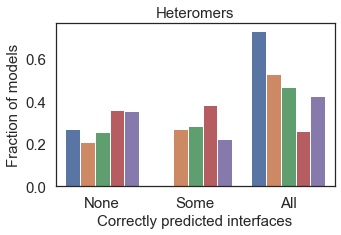

In [68]:
axis_font = {'size':'15'}
plt.figure(figsize=(5,3))

sns.barplot(data=perchain_hete,x='Correct Interfaces',y='Frac', hue='num_chains', order=['None', 'Some', 'All'])
#plt.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=5)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Correctly predicted interfaces", **axis_font)
plt.ylabel("Fraction of models", **axis_font)
plt.title('Heteromers', **axis_font)
plt.legend([],[], frameon=False)
plt.savefig('figures/interfaces_heteromers_AFN.jpg',dpi=350, bbox_inches='tight')

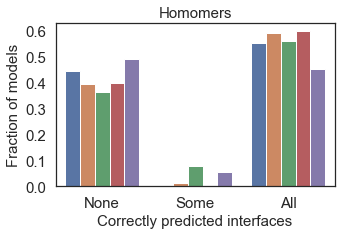

In [69]:
axis_font = {'size':'15'}
plt.figure(figsize=(5,3))

sns.barplot(data=perchain_homo,x='Correct Interfaces',y='Frac', hue='num_chains',order=['None', 'Some', 'All'])
plt.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=5)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Correctly predicted interfaces", **axis_font)
plt.ylabel("Fraction of models", **axis_font)
plt.title('Homomers', **axis_font)
plt.legend([],[], frameon=False)
plt.savefig('figures/interfaces_homomers_AFN.jpg',dpi=350, bbox_inches='tight')

## Figure 5

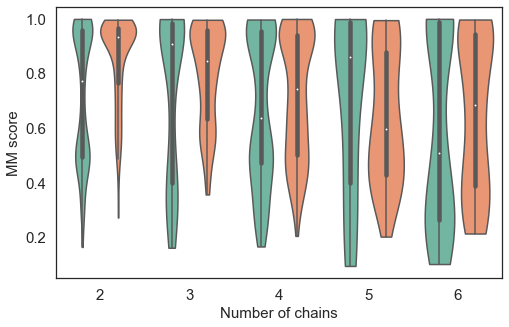

In [148]:
axis_font = {'size':'15'}
plt.figure(figsize=(8,5))

sns.violinplot(x="num_chains", y="MM-score", hue='class',split=False, hue_order=['homomer','heteromer'], cut=0, data=perid,palette='Set2') #inner="points"
plt.xlabel("Number of chains",**axis_font)
plt.ylabel("MM score",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.legend(fontsize=15, loc=3)
plt.legend([],[], frameon=False)
plt.savefig('figures/MMscore.jpg',dpi=350)
plt.show()

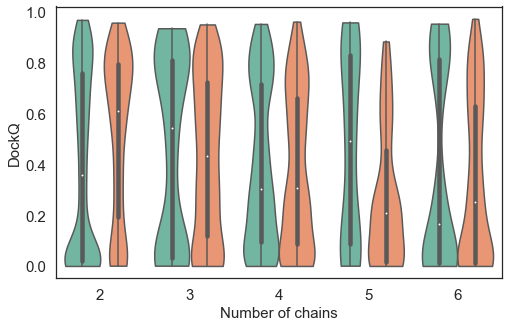

In [149]:
axis_font = {'size':'15'}
plt.figure(figsize=(8,5))

sns.violinplot(x="num_chains", y="$DockQ_{i}$", hue='class',split=False, hue_order=['homomer','heteromer'], cut=0, data=perchain,palette='Set2') #inner="points"
plt.legend(loc=1)
plt.xlabel("Number of chains",**axis_font)
plt.ylabel("DockQ",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.legend(fontsize=15, loc=1)
plt.legend([],[], frameon=False)
plt.savefig('figures/DockQ_perchain.jpg',dpi=350)
plt.show()

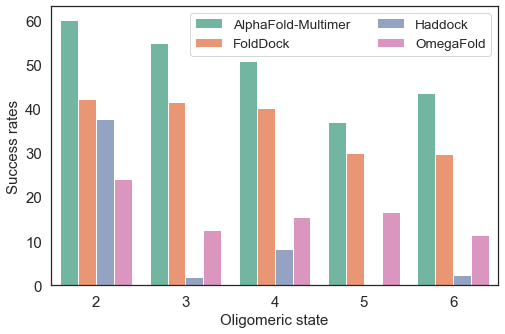

In [145]:
## TO DO - COMPARISON OF METHODS
## ADD FOLDDOCK

df=pd.read_csv('../../output/sr.csv')
df

axis_font = {'size':'15'}
plt.figure(figsize=(8,5))

sns.barplot(x="Oligomeric state", y="Success rates", hue='Method', data=df,palette='Set2') #inner="points"

plt.xlabel("Oligomeric state",**axis_font)
plt.ylabel("Success rates",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc=0,fontsize=13.5, ncol=2)
#plt.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.4),
#          ncol=2, fancybox=True)
plt.subplots_adjust(top=0.9)
plt.savefig('figures/sr_methods.jpg',dpi=350,)#bbox_inches='tight')
plt.show()

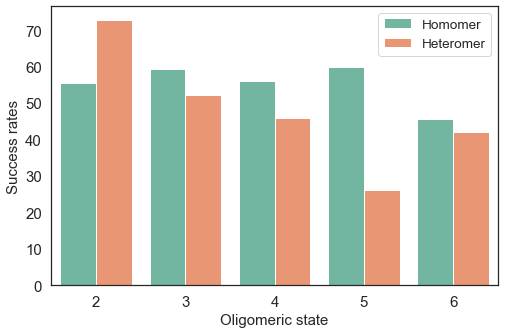

In [147]:
df=pd.read_csv('../../output/sr_afm.csv')
df

axis_font = {'size':'15'}
plt.figure(figsize=(8,5))

sns.barplot(x="Oligomeric state", y="Success rates", hue='class', data=df,palette='Set2') #inner="points"

plt.xlabel("Oligomeric state",**axis_font)
plt.ylabel("Success rates",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc=0,fontsize=13.5)
#plt.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.3),
#          ncol=2, fancybox=True)
plt.subplots_adjust(top=0.9)
plt.savefig('figures/sr_afm.jpg',dpi=350,)#bbox_inches='tight')
plt.show()

## Figure 6

<ipython-input-224-786e632f6c70>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d11['Classification']='Bad models'
<ipython-input-224-786e632f6c70>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d22['Classification']='Good models'


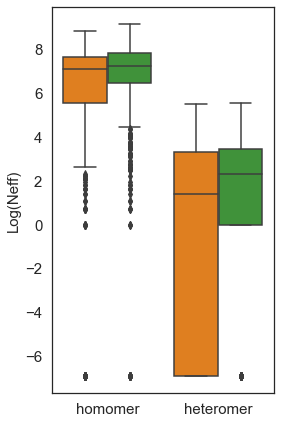

<ipython-input-224-786e632f6c70>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d11['Classification']='Bad models'
<ipython-input-224-786e632f6c70>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d22['Classification']='Good models'


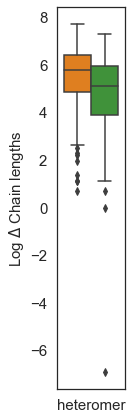

<ipython-input-224-786e632f6c70>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Classification']='Bad models'
<ipython-input-224-786e632f6c70>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['Classification']='Good models'


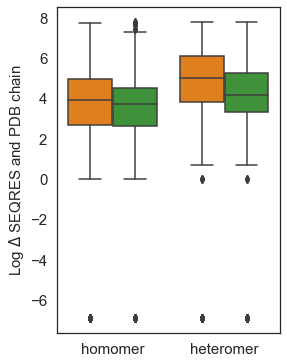

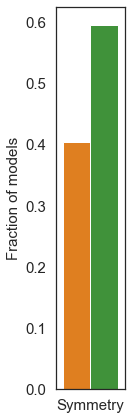

In [224]:
plt.figure(figsize=(4,6))
axis_font = {'size':'15'}

neff=pd.read_csv('../../data/csv/neff.csv',delimiter=' ', names=['pdbid', 'neff'])
neff['neff_log'] = np.log(neff['neff']+0.001)
    
peridm=perid.merge(neff, on=['pdbid'])

d1=peridm.loc[(peridm['min $DockQ_{i}$']<0.23)&(peridm['MM-score']<0.75)]#&(peridm['class']=='heteromer')]
d2=peridm.loc[(peridm['min $DockQ_{i}$']>=0.23)&(peridm['MM-score']>=0.75)]#&(peridm['class']=='heteromer')]
    
d11=d1[['pdbid', 'min $DockQ_{i}$', 'MM-score','neff_log', 'class']]
d11['Classification']='Bad models'
d22=d2[['pdbid', 'min $DockQ_{i}$', 'MM-score','neff_log', 'class']]
d22['Classification']='Good models'
    
dout1=d11.append(d22)

sns.boxplot(x="class", y="neff_log", hue='Classification', data=dout1, palette='Paired_r') #inner="points"
plt.ylabel("Log(Neff)",**axis_font)
plt.xlabel("",**axis_font)
plt.tight_layout()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.legend(bbox_to_anchor=(1, 0.5))
plt.legend([],[], frameon=False)
plt.savefig('figures/neff.png', dpi=350)
plt.show()


#print (mannwhitneyu(dout1.loc[(dout['Classification']=='Bad models') & (dout1['class']=='homomer') ]['neff_log'],(dout1.loc[(dout1['Classification']=='Good models') & (dout1['class']=='homomer')]['neff_log'])))
plt.figure(figsize=(2,6))

perchain_top = pd.read_csv('../../output/scores_perchain_1mod.csv')
perchain_top.head(5)
perid_plot = pd.read_csv('../../output/perid_plot.csv')
perid_plot.head(5) 

seqlen_diff=perchain_top.groupby('pdbid').apply(lambda grp:grp['seqlen'].max()-grp['seqlen'].min()).reset_index()
seqlen_diff.rename(columns={0:'diff_seqlen'},inplace=True)
perid_plot=perid_plot.merge(seqlen_diff,on=['pdbid'])


perid_plot.rename(columns = {'min_miDockQ':'min $DockQ_{i}$', 'max_miDockQ':'max $DockQ_{i}$','avg_miDockQ':'avg $DockQ_{i}$', 
                        'min_pwDockQ':'min $DockQ_{ij}$', 'max_pwDockQ':'max $DockQ_{ij}$','avg_pwDockQ':'avg $DockQ_{ij}$',
                        'min_pDockQ':'min pDockQ','min_pmiDockQ':'$pDockQ_{i}$' }, inplace = True)

perid_plot=perid_plot[perid_plot['num_chains']>2]

peridm=perid_plot
d1=peridm.loc[(peridm['min $DockQ_{i}$']<0.23)&(peridm['MMscore']<0.75)&(peridm['class']=='heteromer')]
d2=peridm.loc[(peridm['min $DockQ_{i}$']>=0.23)&(peridm['MMscore']>=0.75)&(peridm['class']=='heteromer')]

d11=d1[['pdbid', 'min $DockQ_{i}$', 'MMscore','diff_seqlen', 'class']]
d11['Classification']='Bad models'
d22=d2[['pdbid', 'min $DockQ_{i}$', 'MMscore','diff_seqlen', 'class']]
d22['Classification']='Good models'

dout2=d11.append(d22)

dout2['diff_seqlen_log'] = np.log(dout['diff_seqlen']+0.001)

sns.boxplot(x="class", y="diff_seqlen_log", hue='Classification', data=dout2, palette='Paired_r')
plt.ylabel("Log $\Delta$ Chain lengths",**axis_font)
plt.xlabel("",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.savefig('figures/delta_chainseq.png', dpi=350)
plt.show()

plt.figure(figsize=(4,6))

perchainm=perchain_top

d1=perchainm.loc[(perchainm['DockQ']<0.23)]
d2=perchainm.loc[(perchainm['DockQ']>=0.23)]

d1['Classification']='Bad models'
d2['Classification']='Good models'

dout3=d1.append(d2)

dout3['diff_AA_log'] = np.log(dout3['diff_AA']+0.001)

sns.boxplot(x="class", y="diff_AA_log", hue='Classification', data=dout3, palette='Paired_r')
plt.ylabel("Log $\Delta$ SEQRES and PDB chain",**axis_font)
plt.xlabel("",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend([],[], frameon=False)
plt.savefig('figures/delta_seqres.png', dpi=350)
plt.show()

plt.figure(figsize=(2,6))

good_sym=len(peridm.loc[(peridm['min $DockQ_{i}$']>=0.23)&(peridm['MMscore']>=0.75)&(perid['Symmetry']=='C1')])
bad_sym=len(peridm.loc[(peridm['min $DockQ_{i}$']<0.23)&(peridm['MMscore']<0.75)&(perid['Symmetry']=='C1')])
good_asym=len(peridm.loc[(peridm['min $DockQ_{i}$']>=0.23)&(peridm['MMscore']>=0.75)&(perid['Symmetry']!='C1')])
bad_asym=len(peridm.loc[(peridm['min $DockQ_{i}$']<0.23)&(peridm['MMscore']<0.75)&(perid['Symmetry']!='C1')])

val=[good_sym/(good_sym+bad_sym),bad_sym/(good_sym+bad_sym)]
class_lst=['Bad models', 'Good models',]
symm=['Symmetry','Symmetry']
frac_symdf=pd.DataFrame()
frac_symdf['classification']=class_lst
frac_symdf['Symmetry']=symm
frac_symdf['Fraction']=val

#print (mannwhitneyu(dout2.loc[(dout2['Classification']=='Bad models') & (dout2['class']=='heteromer') ]['Symmetrical'],(dout2.loc[(dout2['Classification']=='Good models') & (dout2['class']=='heteromer')]['Symmetrical'])))
#print (mannwhitneyu(dout2.loc[(dout2['Classification']=='Bad models')]['Symmetrical'],(dout2.loc[(dout2['Classification']=='Good models')]['Symmetrical'])))
#print (mannwhitneyu(dout.loc[(dout['Classification']=='Bad models') & (dout['class']=='homomer') ]['diff_AA'],(dout.loc[(dout['Classification']=='Good models') & (dout['class']=='homomer')]['diff_AA'])))

sns.barplot(data=frac_symdf, x="Symmetry", hue="classification",y='Fraction', palette='Paired_r')


plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("",**axis_font)
plt.ylabel("Fraction of models", **axis_font)
plt.legend([],[], frameon=False)
#plt.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.tight_layout()

#plt.savefig('figures/comparison.jpg',dpi=350, bbox_inches='tight')
plt.savefig('figures/symmetry.png', dpi=350)
plt.show()
#plt.savefig('figures/comparison.jpg',dpi=350, bbox_inches='tight')
#plt.savefig('figures/symmetry.png', dpi=350)

#plt.xlim(xmin=0)
#plt.tight_layout()
#plt.legend(loc=3)
#plt.savefig('figures/delta_seqres.png', dpi=350)
#plt.show()

In [5]:
df=pd.read_csv('../../output/pDockQ_update.csv',delimiter=',')
df.head(5)

pdbid  num_chains    class chain1    pDockQ  $pDockQ_{i}$  $DockQ_{i}$  \
0  5mlq           2  homomer      A  0.641757      0.902692        0.913   
1  5mlq           2  homomer      B  0.641712      0.902692        0.913   
2  5nl6           2  homomer      A  0.724091      0.653165        0.660   
3  5nl6           2  homomer      B  0.723621      0.653165        0.660   
4  5od9           2  homomer      A  0.058586      0.017934        0.059   

   IF_interPAE_norm  IFplDDT_afm  
0          0.977996    97.274412  
1          0.977996    97.274412  
2          0.935719    90.246667  
3          0.935719    90.246667  
4          0.360106    63.968125

L= 1.31 x0= 84.733 k= 0.075 b= 0.005
Average error for sigmoid fit is  0.006962940643330603


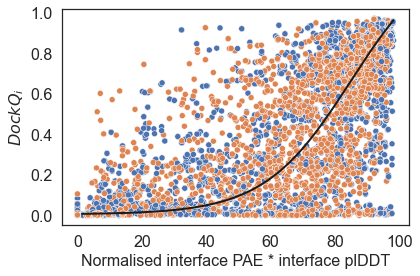

In [620]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
def func(x, a, b,c):
    return x[0] * a+b * x[1]+ c

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

def fit_newscore(column):

    testdf = df[df[column]>0]

    colval = testdf[column].values
    dockq = testdf['$DockQ_{i}$'].values
    xdata =colval[np.argsort(colval)]
    ydata = dockq[np.argsort(dockq)]

    p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, xdata, ydata,p0)# method='dogbox', maxfev=50000)
    
    tiny=1.e-20
    print('L=',np.round(popt[0],3),'x0=',np.round(popt[1],3), 'k=',np.round(popt[2],3), 'b=',np.round(popt[3],3))

    x_pmiDockQ = testdf[column].values
    x_pmiDockQ = x_pmiDockQ[np.argsort(x_pmiDockQ)]
    y_pmiDockQ = sigmoid(x_pmiDockQ, *popt)
    print("Average error for sigmoid fit is ", np.average(np.absolute(y_pmiDockQ-ydata)))

    
    #sns.kdeplot(data=df,x=column,y='DockQ',kde=True,levels=5,fill=True, alpha=0.8, cut=0)
    sns.scatterplot(data=df,x=column,y='$DockQ_{i}$', hue='class')
    plt.legend([],[], frameon=False)
    
    plt.plot(x_pmiDockQ, y_pmiDockQ,label='fit',color='k',linewidth=2)
    return popt

## Linear regression

#linear_regressor = LinearRegression()
#df["mult"]=df.IF_interPAE_norm*df.IFplDDT_afm/100
df["mult"]=df.IF_interPAE_norm*df.IFplDDT_afm

X = df[["mult"]]
Y = df["$DockQ_{i}$"]

#reg=linear_regressor.fit(X, Y) 
#Y_pred = linear_regressor.predict(X)

#print (np.round(np.corrcoef(Y,Y_pred)[0,1],3), round(stats.spearmanr(Y,Y_pred)[0],3))
#print(reg.score(X, Y),reg.coef_)
#plt.scatter(Y_pred,Y)
#plt.show()
 
axis_font = {'size':'16'}

## Sigmoid fit
df_test=df.copy()
fitpopt=fit_newscore('mult')
df_test['pmiDockQ_mult']=sigmoid(df_test.mult.values,*fitpopt)
plt.xlabel('Normalised interface PAE * interface plDDT', **axis_font)
plt.ylabel('$DockQ_{i}$', **axis_font)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()

plt.savefig('figures/pdockq_1.jpg',format='jpg',dpi=350)


In [8]:
df1=df[df.num_chains ==2]

     pDockQ  $pDockQ_{i}$  $DockQ_{i}$    class
0  0.641757      0.902692        0.913  homomer
1  0.641712      0.902692        0.913  homomer
2  0.724091      0.653165        0.660  homomer
3  0.723621      0.653165        0.660  homomer
0.773453677226607
0.6347699776586315
0.6845367483397274


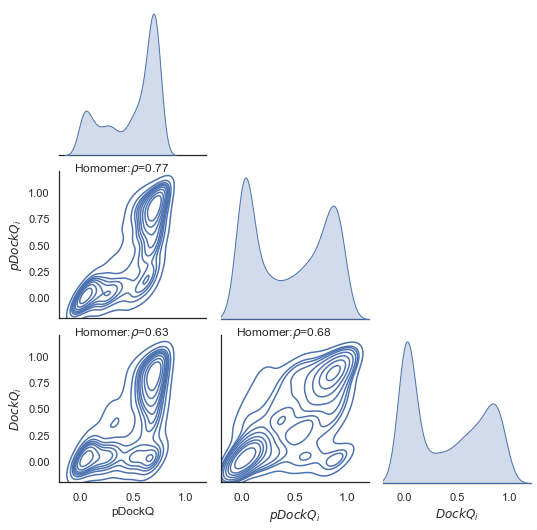

In [9]:
sns.color_palette()

def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y, nan_policy='omit')
    print (r)
    label = r'$\rho$='+ str(round(r, 2))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.1,1) #if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("Homomer:{}".format(label), xy = pos, size = 12, xycoords = ax.transAxes)

#print (df)
dfm_select = df1[['pDockQ','$pDockQ_{i}$','$DockQ_{i}$','class']]
dfm_select1 = dfm_select[dfm_select["class"]=='homomer']
print (dfm_select1.head(4))

#jdf=df[df['class']=='heteromer'][['pDockQ','$pDockQ_{i}$','$DockQ_{i}$']]
#print (jdf.head(4))
#g=sns.pairplot(df[df['class']=='homomer'][['pDockQ','$pDockQ_{i}$','$DockQ_{i}$']],kind='kde')

g=sns.pairplot(data=dfm_select1, corner=True, kind='kde')
#g=sns.pairplot(data=dfm_select, hue='class', corner=True)
g.map_lower(corrfunc)

axis_font = {'size':'12'}

plt.subplots_adjust(wspace =0.1,hspace =0.1)
g.set(ylim=(-0.2,1.2))
g.set(xlim=(-0.2,1.2))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.85, 0.5))
#g._legend.remove()

#plt.savefig('figures/pdockq_1_homomer.jpg',dpi=450)
plt.show()

0.7446058861260652
0.6645997702996684
0.7024324352846484


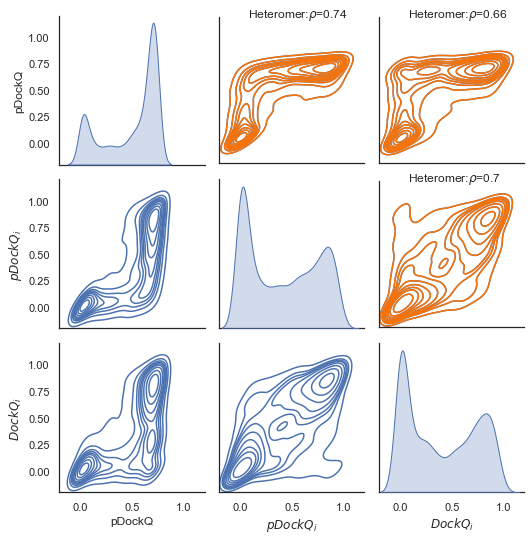

In [589]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y, nan_policy='omit')
    print (r)
    label = r'$\rho$='+ str(round(r, 2))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.2,1) #if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("Heteromer:{}".format(label), xy = pos, size = 12, xycoords = ax.transAxes)

#print (df)
dfm_select = df[['pDockQ','$pDockQ_{i}$','$DockQ_{i}$','class']]
#dfm_select1 = dfm_select[dfm_select["class"]=='heteromer']

g=sns.pairplot(data=dfm_select1, corner=False, kind='kde')
g.map_upper(sns.kdeplot,color=sns.xkcd_rgb['orange'])
g.map_upper(corrfunc)

axis_font = {'size':'12'}

plt.subplots_adjust(wspace =0.1,hspace =0.1)
g.set(ylim=(-0.2,1.2))
g.set(xlim=(-0.2,1.2))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.85, 0.5))
#g._legend.remove()

plt.savefig('figures/pdockq_1_heteromer.jpg',dpi=450)
plt.show()

## CORUM

In [53]:
corum_chain = pd.read_csv('../../output/corum_perchain_update.csv')
corum_chain.head(4)

corum_id = pd.read_csv('../../output/corum_perid_update.csv')

corum_id.rename(columns = {'min_miDockQ':'min $DockQ_{i}$', 'max_miDockQ':'max $DockQ_{i}$','avg_miDockQ':'avg $DockQ_{i}$', 
                        'min_pwDockQ':'min $DockQ_{ij}$', 'max_pwDockQ':'max $DockQ_{ij}$','avg_pwDockQ':'avg $DockQ_{ij}$',
                        'min_pDockQ':'min pDockQ','min_$pDockQ_{i}$':'min $pDockQ_{i}$' }, inplace = True)
corum_id.head(4)

corum_id  num_chains      class    pTM   ipTM  min $pDockQ_{i}$
0      1057           2  heteromer  0.281  0.094          0.008758
1      1064           3  heteromer  0.608  0.527          0.028465
2       118           4  heteromer  0.563  0.570          0.607883
3        12           3  heteromer  0.403  0.357          0.020818

In [54]:
corum_id[corum_id['corum_id']==3094]

corum_id  num_chains      class    pTM  ipTM  min $pDockQ_{i}$
7      3094           2  heteromer  0.798  0.86          0.702065

In [70]:
len(corum_id[(corum_id['pTM']>.5) &(corum_id['min $pDockQ_{i}$']>.23)])

9

/Users/aditishenoy/miniconda3/envs/squids/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aditishenoy/miniconda3/envs/squids/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


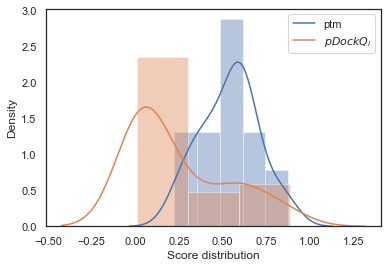

In [8]:
sns.distplot(corum_id['pTM'])
#sns.distplot(corum_id['ipTM'])
sns.distplot(corum_id['$pDockQ_{i}$'])
plt.legend(labels=['ptm', '$pDockQ_{i}$'])
plt.xlabel('Score distribution')
#plt.savefig('../figures/corum_dist.jpg', format='jpg', dpi=350)
plt.show()

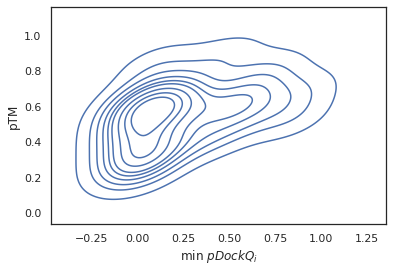

In [40]:
#sns.distplot(corum_id['pTM'])
#sns.distplot(corum_id['ipTM'])
sns.kdeplot(x='min $pDockQ_{i}$', y='pTM', data=corum_id)
#plt.legend(labels=['ptm', '$pDockQ_{i}$'])
#plt.xlabel('Score distribution')
plt.savefig('figures/corum_kde.jpg', format='jpg', dpi=350)
plt.show()

## Fig S4

In [49]:
all_petras_before=pd.read_csv('../../output/perid_v220.csv',delimiter=',',)
petras_before = all_petras_before[['pdbid', 'ifTrain','class']].drop_duplicates()
petras_before=petras_before[petras_before['ifTrain']=='bef']
petras_before

perid_before=pd.read_csv('../../output/DockQ_oldbiounit_perid.csv',delimiter=',', skiprows=1, names=['pdbid','model_num','DockQ'])

perid_before_merged=perid_before.merge(petras_before,on=['pdbid']).drop_duplicates('pdbid')

af = perid_before_merged.copy()

af = af[['pdbid', 'ifTrain', 'DockQ', 'class']]
af['class'] = af['class'].replace('hetero', 'heteromer')
af['class'] = af['class'].replace('homo', 'homomer')

perid = pd.read_csv('../../output/perid_plot.csv')

pm=perid[['pdbid', 'min_miDockQ', 'class']]

pm1=pm.copy()
pm1['DockQ']=pm1['min_miDockQ']
pm1['ifTrain']='After'
pm1=pm1.drop(['min_miDockQ'], axis=1)

dfmerge=pd.concat([af, pm1], ignore_index=True, sort=True)


## homo ttest 
print (mannwhitneyu(dfmerge.loc[(dfmerge['ifTrain']!='After')&(dfmerge['class']=='homomer')]['DockQ'], dfmerge.loc[(dfmerge['ifTrain']=='After')&(dfmerge['class']=='homomer')]['DockQ']))
# result: MannwhitneyuResult(statistic=428742.0, pvalue=1.4658493135330627e-57)
## hetero ttest
print (mannwhitneyu(dfmerge.loc[(dfmerge['ifTrain']!='After')&(dfmerge['class']=='heteromer')]['DockQ'], dfmerge.loc[(dfmerge['ifTrain']=='After')&(dfmerge['class']=='heteromer')]['DockQ']))
# result: MannwhitneyuResult(statistic=265595.0, pvalue=9.083933427554602e-17)

print (mannwhitneyu(dfmerge.loc[(dfmerge['ifTrain']!='After')]['DockQ'], dfmerge.loc[(dfmerge['ifTrain']=='After')]['DockQ']))

MannwhitneyuResult(statistic=504610.5, pvalue=0.9837583419714986)
MannwhitneyuResult(statistic=307755.0, pvalue=2.366776247682784e-17)
MannwhitneyuResult(statistic=1608577.5, pvalue=5.214879537036924e-13)


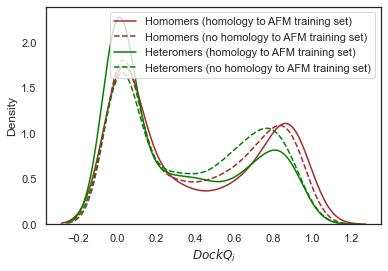

In [9]:
axis_font = {'size':'12'}

sns.kdeplot(dfmerge.loc[(dfmerge['ifTrain']!='After')&(dfmerge['class']=='homomer')]['DockQ'],color='brown',label='Homomers (homology to AFM training set)')
sns.kdeplot(dfmerge.loc[(dfmerge['ifTrain']=='After')&(dfmerge['class']=='homomer')]['DockQ'],color='brown',linestyle="--",label='Homomers (no homology to AFM training set)')
sns.kdeplot(dfmerge.loc[(dfmerge['ifTrain']!='After')&(dfmerge['class']=='heteromer')]['DockQ'],color='green',label='Heteromers (homology to AFM training set)')
sns.kdeplot(dfmerge.loc[(dfmerge['ifTrain']=='After')&(dfmerge['class']=='heteromer')]['DockQ'],linestyle="--",color='green',label='Heteromers (no homology to AFM training set)')
#plt.legend()
plt.xlabel("$DockQ_{i}$",**axis_font)
#plt.legend(bbox_to_anchor=(1.05, 0), loc='upper left', borderaxespad=0.)
plt.legend()
#plt.legend()
#plt.tight_layout()
plt.savefig('figures/before_afterTraining.png', dpi=350)
plt.show()

# Success rate table

In [12]:
clas = 'homomer'
num_chains=2

df_all = perid[(perid.num_chains==num_chains)  & (perid['class']==clas)]
df_acceptable=df_all[df_all['MMscore']>= 0.75]

len(df_acceptable), len(df_all), len(df_acceptable)/len(df_all)

(424, 838, 0.5059665871121718)

In [61]:
g = perid[(perid['min_miDockQ']<=0.23) & (perid['min_pmiDockQ']>0.85)]
#list(g['pdbid'].unique())
g1 = g[['pdbid', 'num_chains', 'class', 'MMscore', 'pTM', 'ipTM', 'Symmetry', 'min_miDockQ', 'min_pmiDockQ']]
len(g1)

#g1.to_csv('../output/supp_table_highpmiDockQ_lowDockQ.csv', index=False)

pdbid  num_chains      class  MMscore  RMSD    pTM   ipTM Symmetry  \
1372  5yys           4    homomer  0.91723  4.95  0.708  0.658       D2   
1532  7qqk           4    homomer  0.80560  6.44  0.747  0.676        H   
1574  6fon           4  heteromer  0.43767  4.49  0.553  0.437       C2   
1674  7d3f           4  heteromer  0.80352  5.86  0.608  0.602       C2   
1812  6ncy           6    homomer  0.99291  1.44  0.791  0.761       D3   

      min_pwDockQ  avg_pwDockQ  max_pwDockQ  min_miDockQ  avg_miDockQ  \
1372        0.442     0.466250        0.493        0.212     0.214250   
1532        0.386     0.400667        0.409        0.229     0.325333   
1574        0.374     0.388500        0.403        0.105     0.212500   
1674        0.276     0.431400        0.667        0.000     0.000000   
1812        0.684     0.773167        0.900        0.000     0.000000   

      max_miDockQ  min_interPAE  min_pDockQ  min_pmiDockQ  
1372        0.218      0.308342    0.519761      0.191261  
1532        0.372      0.325055    0.256989      0.182735  
1574        0.322      0.305194    0.513114      0.185320  
1674        0.000      0.143251    0.363924      0.074113  
1812        0.000      0.476583    0.600181      0.365998

In [26]:
g = perid[(perid['min $DockQ_{i}$']<=0.1) & (perid['MMscore']>0.75)]
#list(g['pdbid'].unique())
len(g[g['class']=='heteromer'])

58

In [ ]:
g = perchain[(perchain['miDockQ']<0.2) & (perchain['pwDockQ']>0.8) & (perchain['miDockQ']>0) & (perchain['pwDockQ']>0)]
list(g['pdbid'].unique())

In [94]:
perchain[perchain['pdbid']=='6li9'].drop_duplicates()

pdbid  num_chains      class chain1  miDockQ  pwDockQ  \
15022  6li9           4  heteromer      A    0.796    0.902   
15026  6li9           4  heteromer      A    0.796    0.755   
15030  6li9           4  heteromer      B    0.792    0.902   
15034  6li9           4  heteromer      B    0.792    0.757   
15038  6li9           4  heteromer      C    0.655    0.755   
15042  6li9           4  heteromer      C    0.655    0.166   
15046  6li9           4  heteromer      D    0.656    0.757   
15050  6li9           4  heteromer      D    0.656    0.166   

       Fnat_native_contacts   IF_plDDT  interPAE    pDockQ  pmiDockQ  
15022                   139  83.710556  0.395383  0.580863  0.296212  
15026                   139  83.710556  0.395383  0.580863  0.296212  
15030                   139  83.458621  0.422007  0.568069  0.322190  
15034                   139  83.458621  0.422007  0.568069  0.322190  
15038                    91  83.190270  0.334156  0.497032  0.232611  
15042                    91  83.190270  0.334156  0.497032  0.232611  
15046                    91  82.859577  0.255077  0.493629  0.167183  
15050                    91  82.859577  0.255077  0.493629  0.167183

In [95]:
perid[perid['pdbid']=='6li9'].drop_duplicates()

pdbid  num_chains      class  MMscore  RMSD    pTM   ipTM Symmetry  \
1597  6li9           4  heteromer  0.96335   3.0  0.732  0.682       C2   

      min_pwDockQ  avg_pwDockQ  max_pwDockQ  min_miDockQ  avg_miDockQ  \
1597        0.166        0.645        0.902        0.655      0.72475   

      max_miDockQ  min_interPAE  min_pDockQ  min_pmiDockQ  
1597        0.796      0.255077    0.493629      0.167183

## Updated pdockQi

In [7]:
perid = pd.read_csv('../../output/perid_plot.csv')


perid.rename(columns = {'min_miDockQ':'min $DockQ_{i}$', 'max_miDockQ':'max $DockQ_{i}$','avg_miDockQ':'avg $DockQ_{i}$', 
                        'min_pwDockQ':'min $DockQ_{ij}$', 'max_pwDockQ':'max $DockQ_{ij}$','avg_pwDockQ':'avg $DockQ_{ij}$',
                        'min_pDockQ':'min pDockQ','min_pmiDockQ':'min $pDockQ_{i}$', 'MMscore':'MM-score'}, inplace = True)

perid.head(5)

pdbid  num_chains    class  MM-score  RMSD    pTM   ipTM Symmetry  \
0  5mlq           2  homomer   0.97785  1.20  0.866  0.851       C2   
1  5nl6           2  homomer   0.95927  1.62  0.834  0.818       C2   
2  5od9           2  homomer   0.58725  3.72  0.445  0.223       C2   
3  5ow2           2  homomer   0.85494  2.28  0.671  0.662       C2   
4  5w4a           2  homomer   0.93889  1.99  0.870  0.796       C2   

   min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
0             0.913             0.913             0.913            0.913   
1             0.660             0.660             0.660            0.660   
2             0.059             0.059             0.059            0.059   
3             0.617             0.617             0.617            0.617   
4             0.661             0.661             0.661            0.661   

   avg $DockQ_{i}$  max $DockQ_{i}$  min_interPAE  min pDockQ  \
0            0.913            0.913      8.894755    0.459902   
1            0.660            0.660      6.939106    0.452864   
2            0.059            0.059     18.369370    0.076469   
3            0.617            0.617     14.842103    0.517812   
4            0.661            0.661      7.369001    0.402802   

   min $pDockQ_{i}$  
0          0.900757  
1          0.641370  
2          0.022005  
3          0.434434  
4          0.621381

In [8]:
perid=perid.drop(['min pDockQ','min $pDockQ_{i}$', 'min_interPAE'], axis=1)
perid

pdbid  num_chains      class  MM-score  RMSD    pTM   ipTM Symmetry  \
0     5mlq           2    homomer   0.97785  1.20  0.866  0.851       C2   
1     5nl6           2    homomer   0.95927  1.62  0.834  0.818       C2   
2     5od9           2    homomer   0.58725  3.72  0.445  0.223       C2   
3     5ow2           2    homomer   0.85494  2.28  0.671  0.662       C2   
4     5w4a           2    homomer   0.93889  1.99  0.870  0.796       C2   
...    ...         ...        ...       ...   ...    ...    ...      ...   
1923  7v5y           6  heteromer   0.63836  4.24  0.616  0.559       C2   
1924  7vgs           6  heteromer   0.43805  5.98  0.488  0.405       C2   
1925  7vlx           6  heteromer   0.75638  5.77  0.857  0.857       C3   
1926  7w54           6  heteromer   0.22624  4.61  0.322  0.185       C1   
1927  7xq8           6  heteromer   0.27042  8.76  0.331  0.283       C1   

      min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
0                0.913          0.913000             0.913            0.913   
1                0.660          0.660000             0.660            0.660   
2                0.059          0.059000             0.059            0.059   
3                0.617          0.617000             0.617            0.617   
4                0.661          0.661000             0.661            0.661   
...                ...               ...               ...              ...   
1923             0.020          0.312600             0.818            0.027   
1924             0.012          0.168111             0.811            0.010   
1925             0.257          0.387667             0.571            0.375   
1926             0.001          0.005625             0.029            0.002   
1927             0.005          0.173000             0.555            0.097   

      avg $DockQ_{i}$  max $DockQ_{i}$  
0            0.913000            0.913  
1            0.660000            0.660  
2            0.059000            0.059  
3            0.617000            0.617  
4            0.661000            0.661  
...               ...              ...  
1923         0.351500            0.533  
1924         0.104444            0.274  
1925         0.400833            0.427  
1926         0.004313            0.012  
1927         0.141937            0.279  

[1928 rows x 14 columns]

In [9]:
perchain = pd.read_csv('../../output/perchain_plot.csv')

perchain.rename(columns = {'miDockQ':'$DockQ_{i}$', 'pwDockQ':'$DockQ_{ij}$', 'pmiDockQ':'$pDockQ_{i}$' }, inplace = True)

perchain.head(5)

pdbid  num_chains    class chain1  $DockQ_{i}$  $DockQ_{ij}$  \
0  5mlq           2  homomer      A        0.913         0.913   
1  5mlq           2  homomer      B        0.913         0.913   
2  5nl6           2  homomer      A        0.660         0.660   
3  5nl6           2  homomer      B        0.660         0.660   
4  5od9           2  homomer      A        0.059         0.059   

   Fnat_native_contacts   IF_plDDT   interPAE    pDockQ  $pDockQ_{i}$  
0                    42  97.274412   8.898357  0.459902      0.900757  
1                    42  97.274412   8.894755  0.459902      0.900757  
2                    95  90.246667   6.939106  0.452864      0.641370  
3                    95  90.246667   6.949329  0.452864      0.641370  
4                    44  63.968125  18.409119  0.076469      0.022005

In [10]:
pdockq_update=pd.read_csv('../../output/pDockQ_update.csv',delimiter=',')
pdockq_update.head(5)

pdbid  num_chains    class chain1    pDockQ  $pDockQ_{i}$  $DockQ_{i}$  \
0  5mlq           2  homomer      A  0.641757      0.902692        0.913   
1  5mlq           2  homomer      B  0.641712      0.902692        0.913   
2  5nl6           2  homomer      A  0.724091      0.653165        0.660   
3  5nl6           2  homomer      B  0.723621      0.653165        0.660   
4  5od9           2  homomer      A  0.058586      0.017934        0.059   

   IF_interPAE_norm  IFplDDT_afm  
0          0.977996    97.274412  
1          0.977996    97.274412  
2          0.935719    90.246667  
3          0.935719    90.246667  
4          0.360106    63.968125

In [11]:
pdockqi_min=pdockq_update.groupby('pdbid').apply(lambda grp: grp['$pDockQ_{i}$'].min()).reset_index()
pdockqi_min.rename(columns = {0:'min $pDockQ_{i}$'}, inplace = True)
pdockq_min=pdockq_update.groupby('pdbid').apply(lambda grp: grp['pDockQ'].min()).reset_index()
pdockq_min.rename(columns = {0:'min pDockQ'}, inplace = True)


peridm = perid.merge(pdockqi_min, on='pdbid')
peridm = peridm.merge(pdockq_min, on='pdbid')
peridm

pdbid  num_chains      class  MM-score  RMSD    pTM   ipTM Symmetry  \
0     5mlq           2    homomer   0.97785  1.20  0.866  0.851       C2   
1     5nl6           2    homomer   0.95927  1.62  0.834  0.818       C2   
2     5od9           2    homomer   0.58725  3.72  0.445  0.223       C2   
3     5ow2           2    homomer   0.85494  2.28  0.671  0.662       C2   
4     5w4a           2    homomer   0.93889  1.99  0.870  0.796       C2   
...    ...         ...        ...       ...   ...    ...    ...      ...   
1923  7v5y           6  heteromer   0.63836  4.24  0.616  0.559       C2   
1924  7vgs           6  heteromer   0.43805  5.98  0.488  0.405       C2   
1925  7vlx           6  heteromer   0.75638  5.77  0.857  0.857       C3   
1926  7w54           6  heteromer   0.22624  4.61  0.322  0.185       C1   
1927  7xq8           6  heteromer   0.27042  8.76  0.331  0.283       C1   

      min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
0                0.913          0.913000             0.913            0.913   
1                0.660          0.660000             0.660            0.660   
2                0.059          0.059000             0.059            0.059   
3                0.617          0.617000             0.617            0.617   
4                0.661          0.661000             0.661            0.661   
...                ...               ...               ...              ...   
1923             0.020          0.312600             0.818            0.027   
1924             0.012          0.168111             0.811            0.010   
1925             0.257          0.387667             0.571            0.375   
1926             0.001          0.005625             0.029            0.002   
1927             0.005          0.173000             0.555            0.097   

      avg $DockQ_{i}$  max $DockQ_{i}$  min $pDockQ_{i}$  min pDockQ  
0            0.913000            0.913          0.902692    0.641712  
1            0.660000            0.660          0.653165    0.723621  
2            0.059000            0.059          0.017934    0.057401  
3            0.617000            0.617          0.415789    0.592171  
4            0.661000            0.661          0.645510    0.631455  
...               ...              ...               ...         ...  
1923         0.351500            0.533          0.034182    0.501024  
1924         0.104444            0.274          0.066278    0.527950  
1925         0.400833            0.427          0.510919    0.724782  
1926         0.004313            0.012          0.009789    0.020421  
1927         0.141937            0.279          0.144727    0.148268  

[1928 rows x 16 columns]

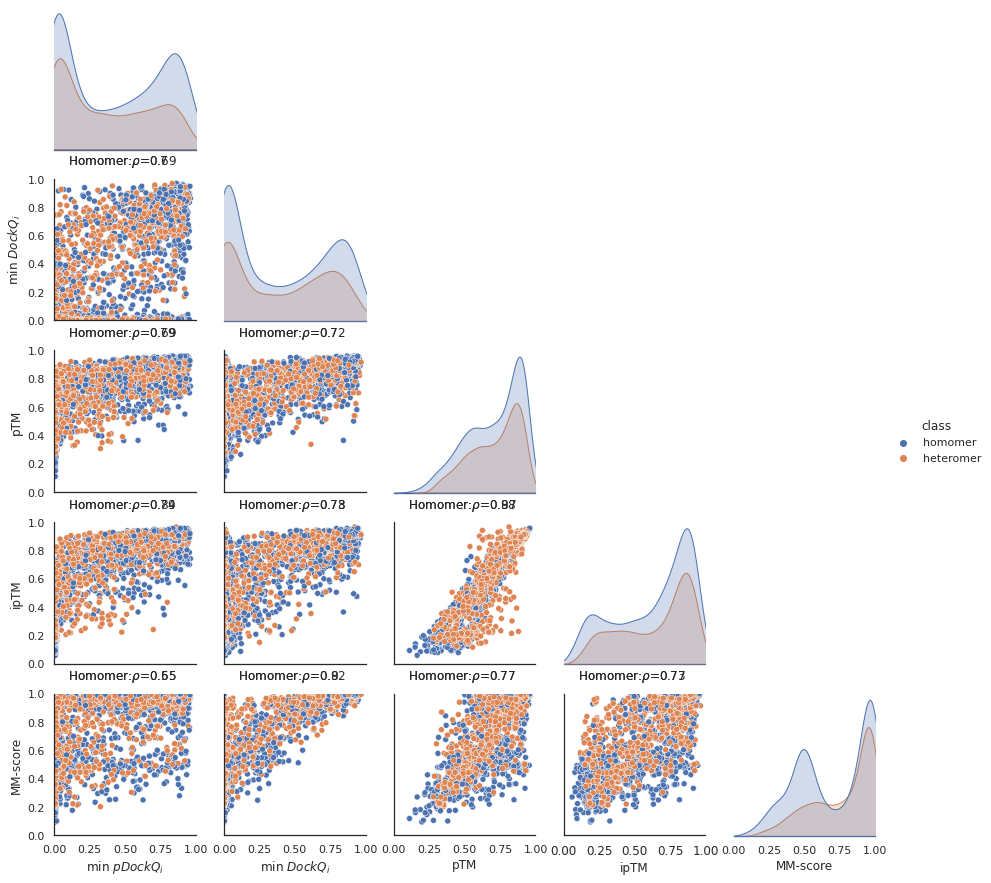

In [67]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y)
    label = r'$\rho$='+ str(round(r, 2))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.1,1.1) #if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("Homomer:{}".format(label), xy = pos, size = 12, xycoords = ax.transAxes)

#dfm_select = perid_above2[['min $DockQ_{i}$', 'max $DockQ_{i}$', 'min $DockQ_{ij}$', 'max $DockQ_{ij}$', 'MMscore','class']]
dfm_select = peridm[['min $pDockQ_{i}$', 'min $DockQ_{i}$','pTM', 'ipTM', 'MM-score', 'class']]
dfm_select1 = dfm_select[dfm_select["class"]=='homomer']

#g=sns.pairplot(data=dfm_select, corner=True)
g=sns.pairplot(data=dfm_select, hue='class', corner=True)
g.map_lower(corrfunc)

axis_font = {'size':'12'}

plt.subplots_adjust(wspace =0.2,hspace =0.2)
g.set(ylim=(0,1))
g.set(xlim=(0,1))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.85, 0.5))
#g._legend.remove()

plt.savefig('figures/pdockq_i_vs_others_diagonal.jpg',dpi=450)
plt.show()

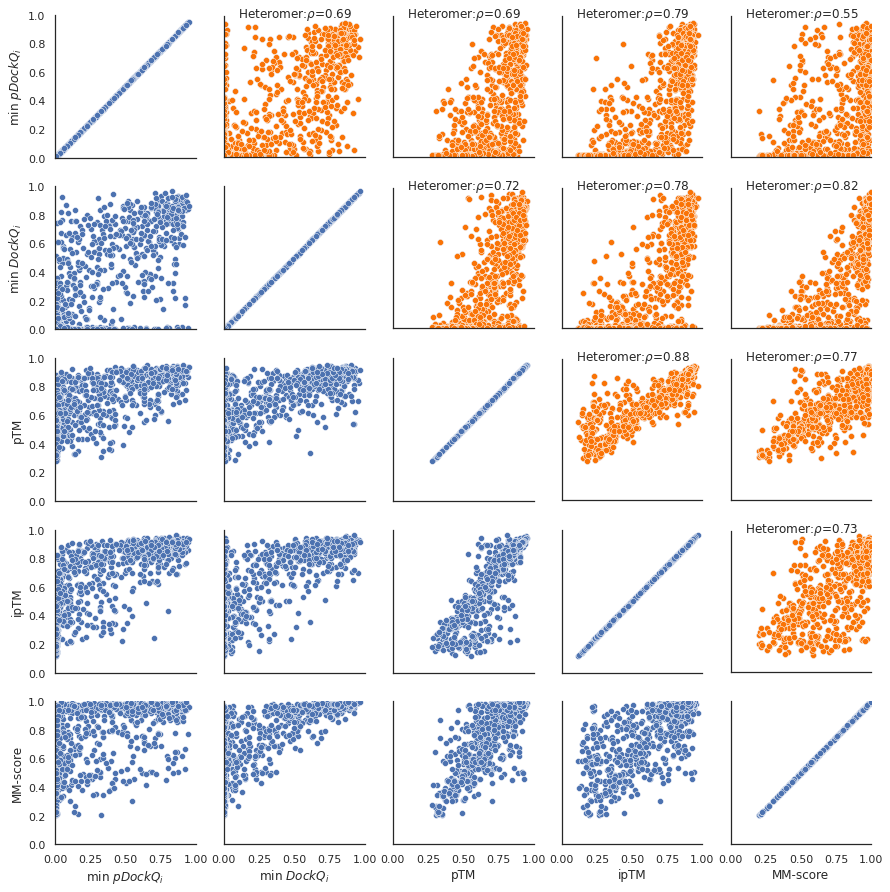

In [65]:
def corrfunc(x, y, ax=None, **kws):
    r, _ = spearmanr(x, y)
    label = r'$\rho$='+ str(round(r, 2))
    ax = plt.gca()
    #pos = (.6, .1 - .1*n)
    ax.set_aspect('equal', adjustable='box')
    pos = (0.1,0.99) #if kws['label'] == 'homomer' else (0.05,0.95)
    ax.annotate("Heteromer:{}".format(label), xy = pos, size = 12, xycoords = ax.transAxes)

#dfm_select = perid_above2[['min $DockQ_{i}$', 'max $DockQ_{i}$', 'min $DockQ_{ij}$', 'max $DockQ_{ij}$', 'MMscore','class']]
dfm_select = peridm[['min $pDockQ_{i}$', 'min $DockQ_{i}$','pTM', 'ipTM', 'MM-score', 'class']]
dfm_select = dfm_select[dfm_select["class"]=='heteromer']

g=sns.pairplot(data=dfm_select, corner=False, diag_kind=None)
g.map_upper(sns.scatterplot,color=sns.xkcd_rgb['orange'])
g.map_upper(corrfunc)

axis_font = {'size':'12'}

plt.subplots_adjust(wspace =0.2,hspace =0.2)
g.set(ylim=(0,1))
g.set(xlim=(0,1))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.85, 0.5))
#g._legend.remove()

plt.savefig('figures/pdockq_i_vs_others_heteromers.jpg',dpi=450)
plt.show()

In [12]:
g = peridm[(peridm['min $DockQ_{i}$']<=0.23) & (peridm['min $pDockQ_{i}$']>0.85)]
#list(g['pdbid'].unique())
g1 = g[['pdbid', 'num_chains', 'class', 'MM-score', 'pTM', 'ipTM', 'Symmetry', 'min $DockQ_{i}$', 'min $pDockQ_{i}$']]
#len(g1)
g1.to_csv('../../output/supp_table_highpmiDockQ_lowDockQ.csv', index=False)

In [15]:
pdockq_update[pdockq_update.pdbid == '6li9']

pdbid  num_chains      class chain1    pDockQ  $pDockQ_{i}$  $DockQ_{i}$  \
3872  6li9           4  heteromer      A  0.707907      0.432329        0.796   
3873  6li9           4  heteromer      B  0.718853      0.436261        0.792   
3874  6li9           4  heteromer      C  0.657975      0.418415        0.655   
3875  6li9           4  heteromer      D  0.584890      0.421659        0.656   

      IF_interPAE_norm  IFplDDT_afm  
3872          0.896156    83.710556  
3873          0.901045    83.458621  
3874          0.893919    83.190270  
3875          0.899335    82.859577

In [46]:
peridm[peridm.pdbid == '5xll']

pdbid  num_chains    class  MM-score  RMSD    pTM   ipTM Symmetry  \
9  5xll           2  homomer   0.40012  2.13  0.815  0.794       C2   

   min $DockQ_{ij}$  avg $DockQ_{ij}$  max $DockQ_{ij}$  min $DockQ_{i}$  \
9             0.008             0.008             0.008            0.008   

   avg $DockQ_{i}$  max $DockQ_{i}$  min $pDockQ_{i}$  min pDockQ  
9            0.008            0.008          0.874162    0.690663

In [ ]:
neff=pd.read_csv('../../data/csv/neff.csv',delimiter=' ', names=['pdbid', 'neff'])

perid = pd.read_csv('../../output/perid_plot.csv')


perid.rename(columns = {'min_miDockQ':'min $DockQ_{i}$', 'max_miDockQ':'max $DockQ_{i}$','avg_miDockQ':'avg $DockQ_{i}$', 
                        'min_pwDockQ':'min $DockQ_{ij}$', 'max_pwDockQ':'max $DockQ_{ij}$','avg_pwDockQ':'avg $DockQ_{ij}$',
                        'min_pDockQ':'min pDockQ','min_pmiDockQ':'min $pDockQ_{i}$', 'MMscore':'MM-score'}, inplace = True)

perid.head(5)

In [77]:
df_afm = pd.read_csv('../../output/legacy/DockQ_AFm_perid.csv')
df_afm['Method']='AlphaFold-Multimer'
df_fd = pd.read_csv('../../output/legacy/DockQ_fdnewrun2_perid.csv')
df_fd['Method']='FoldDock'
df_had = pd.read_csv('../../output/legacy/DockQ_haddock2_perid.csv')
df_had['Method']='HADDOCK'
df_annot = pd.read_csv('../../output/legacy/sysinfo.csv')#delimiter=' ', names=['pdbid', 'olgo', 'class'])
#df_annot['Oligomeric State'] = df_annot['olgo'].str[:1]
#df_annot['Class'] = (df_annot['class'])+'mer'
#df_annot=df_annot.drop(['olgo','class'], axis=1)
df_annot1=df_annot[['pdbid', 'class', 'num_chains']]
#print (df_annot)
#df_omg = pd.read_csv('../../output/legacy/DockQ_omegafold_perid.csv')
#df_omg['Method']='OmegaFold'
#df_omg.rename(columns = {'DockQ_omf_min':'DockQ_min', 'DockQ_omf_avg':'DockQ_avg'}, inplace = True)

result = [df_afm, df_fd, df_had]
df_multi= pd.concat(result, axis=0)
df_multi1= df_multi.merge(df_annot1, on='pdbid').drop_duplicates()

In [78]:
df_multi1

pdbid  DockQ_avg  DockQ_min              Method      class  num_chains
0      6e12   0.925000      0.925  AlphaFold-Multimer    homomer           2
10     6e12   0.914000      0.914            FoldDock    homomer           2
20     6e12   0.865000      0.865             HADDOCK    homomer           2
30     6w8o   0.670000      0.670  AlphaFold-Multimer    homomer           2
40     6w8o   0.602000      0.602            FoldDock    homomer           2
...     ...        ...        ...                 ...        ...         ...
57082  6ncz   0.000000      0.000  AlphaFold-Multimer    homomer           6
57100  6ncz   0.000000      0.000             HADDOCK    homomer           6
57118  6so5   0.318667      0.194  AlphaFold-Multimer  heteromer           6
57148  6so5   0.169333      0.111            FoldDock  heteromer           6
57178  6so5   0.057833      0.026             HADDOCK  heteromer           6

[4202 rows x 6 columns]

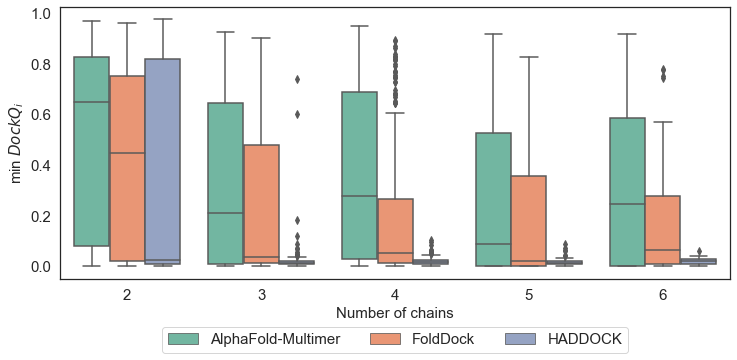

In [109]:
axis_font = {'size':'15'}

df_multi1.rename(columns = {'DockQ_min':'min $DockQ_{i}$', 'DockQ_avg':'avg $DockQ_{i}$'}, inplace = True)

plt.figure(figsize=(12,5))

sns.boxplot(x="num_chains", y="min $DockQ_{i}$", hue='Method', data=df_multi1, palette='Set2') #inner="points"
plt.xlabel("Number of chains",**axis_font)
plt.ylabel("min $DockQ_{i}$",**axis_font)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.legend(fontsize=15, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=5)

plt.savefig('figures/comparison.jpg',dpi=350, bbox_inches='tight')

plt.show()